In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# **CLT for MLE stimators**

$ \sqrt{n}(\theta^* - \theta_n) \rightarrow_L \mathcal{N}(0,I(\theta^*)^{-1}) $

### starting with the normal distribution

estimating $\mu$ ....

MLE estimate of mu = 

$ f(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $

$ F(x,\mu,\sigma) = complicated.... = \dfrac{1}{2}[1 + erf(\dfrac{x-\mu}{\sigma\sqrt{2}})] $


likelihood = pdf just with differnt interpretation

$ L(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2  } $

log likelihood = 

$ l(x,\mu,\sigma) = ln(\dfrac{1}{\sigma \sqrt{2\pi}}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 }  \\
 l(x,\mu,\sigma) = -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $


i.i.d so overlal log likelihood = product of all observations over all observations...

Since we have take hte log the produce becomes a sum

log likelihood = 
$ l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}))  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \dfrac{1}{2\sigma^2} \sum(x - \mu)^2$

**score function** is the gradient of the log-likelihood function with respect to the parameter vector - evaluated at a particular point of hte parameter vector (or in the 1D case with respect to a particular parameter evaluate at a particular parameter value)

$s(\theta) \equiv \dfrac{\partial~l(\theta)}{\partial \theta} $

## estimating MU

Score of normal With respect to $\mu$ = 

$ s_\mu(x,\mu,\sigma) = \dfrac{1}{2\sigma^2} \sum 2(x - \mu) $


MLE estimate of $\mu$ will be when the score = 0

$\dfrac{1}{2\sigma^2} \sum 2(x - \mu) = 0$

$ \sum (x - \mu) = 0$

$ \sum x -  \sum \mu = 0$

$ \sum x =  n\mu $

$ \mu = \dfrac{\sum x}{n} $ 

## estimating sigma

Score of normal With respect to $\sigma$ = 

$ s_\sigma(x,\mu,\sigma) = - \dfrac{n}{\sigma} + \dfrac{1}{\sigma^3} \sum (x - \mu)^2 $


MLE estimate of $\sigma$ will be when the score = 0

$ -\dfrac{n}{\sigma} + \dfrac{1}{\sigma^3} \sum (x - \mu)^2  = 0$

$ \dfrac{n}{\sigma} = \dfrac{1}{\sigma^3} \sum (x - \mu)^2 $

$ \sigma^2 = \dfrac{1}{n} \sum (x - \mu)^2 $








In [152]:
# testing it out
#np.random.seed(seed = 1)

mu = 10
sigma = 15

mu_hats = []
sigma_hats = []
n = 1000
trials = 100

for i in range(trials):
    
    X = stats.norm.rvs(loc = mu, scale = sigma, size = n)

    #print(np.mean(X))
    #print(np.sqrt(np.var(X)))

    mu_hats.append( sum(X)/n )
    #sigma_hats.append( np.sqrt((1/len(X))*sum((X-mu_hats[-1])**2)) ) #dodgy indexing with observed
    sigma_hats.append( (1/n)*sum( (X-mu)**2 ) ) 

# print( (n/(sigma**2))**-1 , np.std( mu_hats) )
# print((2*sigma**4)/np.sqrt(n),np.std(sigma_hats))

mu_hats = np.array(mu_hats)
sigma_hats = np.array(sigma_hats)



#information
I_mu = 1/(sigma**2)
I_sigma = 1/(2*sigma**4)


#print(np.var(np.sqrt(n)*(mu_hats-mu)))
print("mu_bar")
# print(np.var(np.sqrt(n)*(mu_hats - mu)))
# print(1/I_mu)
print(np.var((mu_hats - mu)))
print(1/(n*I_mu))

print("sigma_bar")
# print(np.var(np.sqrt(n)*(sigma_hats - sigma)))
# print(1/(I_sigma))
print(np.var((sigma_hats - sigma)))
print(1/(n*I_sigma))

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.hist( np.sqrt(n) *(mu - mu_hats) ,alpha = 0.5,color = "red")
# ax.hist( stats.norm.rvs(0, (1/( I_mu ))**0.5 , n), alpha = 0.5,color = "blue")

mu_bar
0.2360922857600992
0.22499999999999998
sigma_bar
86.79282561398118
101.25


# IT WORKS

# $\sqrt{n}(\theta^* - \theta_n) \rightarrow_L \mathcal{N}(0,I(\theta^*)^{-1})$

where I(\theta) is the fiscehr information - for 1 observation (as opposed to the observed fischer information which is scaled by n - thust he need for the sqrt(n))

## This makes sense

# $\sqrt{n}(\mu^* - \mu_n) \rightarrow_L \mathcal{N}(0,1/\sigma^{2})$

or

# $(\mu^* - \mu_n) \rightarrow_L \mathcal{N}(0,n/\sigma^{2})$




### information stuff

**second derivative** for the normal with respect to $\mu$ is constant as the score is linear....


$ = 1/\sigma^2 $

WOW - so information jsut depends on varaince... this makes so much sense


 overall FIM of normal distribution

1 = $\mu $

2 = $\sigma$

$
(
 \begin{matrix}
  \frac{1}{\sigma^{2}} & 0  \\
  0 & \frac{1}{2\sigma^{4}}  
 \end{matrix})
$

It is orthogonal as mu and variance are independent of each other

Sigma is much harder to estiamte! - makes sense - wowowowoowowowo!!!!! variance of estiamator is ~ ^2 that of the mu estimator

# 2 sample CLT

$Z=\frac{\bar{X}_1-\bar{X}_2-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$

we are dealing with the random variable $\bar{X_1}-\bar{X_2}- (\mu1 - \mu2)$

Where Xbar are the sample means!

we know $var(\bar{X_i} - \mu_i) = var(\bar{X_i}) =\dfrac{\sigma_i^2}{n_i} $

**note $\mu_i$ is the true population mean and thus has no variance! (i think)**

**When usign CLT this mu is replaced by the hypothesis we are trying to test. e.g. that hte population mu for htat estimator = a given value WOWOWOWOWO**


Anyway back to 2 sample problem

We assume hte 2 groups are independent ... thus the variance of $ var(\bar{X_1}-\bar{X_2} - (\mu1 - \mu2)) = var(\bar{X_1}) + var(\bar{X_2})$


# VARIANCE OF SUM OF RANDOM VARIABLES 

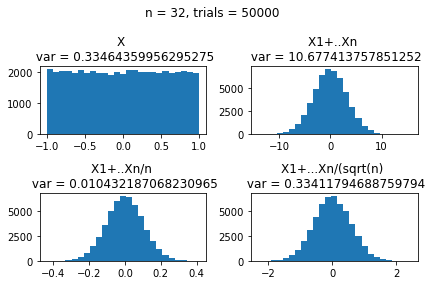

In [3]:
#sum of iid random variables
np.random.seed(1)

#not this drifts away from 0 as it is not corrected fully to give hte Z statistic

# Z = sn - n*mu / sqrt(n)*simga


#define differrent random variables and plot their distributions
def X1():
    # X1
    #CHoose type of rv
    #unifrom becomes normal quickest
    return np.random.uniform(-1,1)

    #exponential
    #return np.random.exponential(1,1)[0]-1

def X1_Xn(n):
    Sn = 0
    for i in range(n):
        Sn += X1()
    return Sn

def X1_Xn_n(n):
    # X1 + X2 + .... Xn / n
    Sn = 0
    for i in range(n):
        Sn += X1()
    return Sn/n

def X1_Xn_sqrt_n(n):
    # X1 + X2 + .... Xn / np.sqrt(n)
    Sn = 0
    for i in range(n):
        Sn += X1()
    return Sn/np.sqrt(n)




# n =  number of random variables
n = 32

# trials = number of experiments
trials = 50000

#bins = 10
bins = 25

#plots
fig = plt.figure()
fig.suptitle("n = {}, trials = {}".format(n,trials))

ax1 = plt.subplot(2,2,1)
data1 = [X1() for i in range(trials)]
ax1.hist(data1,bins)
ax1.set_title("X \n var = {}".format(np.var(data1)))

ax2 = plt.subplot(2,2,2)
data2 = [X1_Xn(n) for i in range(trials)]
ax2.hist(data2,bins)
ax2.set_title("X1+..Xn \n var = {}".format(np.var(data2)))

ax3 = plt.subplot(2,2,3)
data3 = [X1_Xn_n(n) for i in range(trials)]
ax3.hist(data3,bins)
ax3.set_title("X1+..Xn/n \n var = {}".format(np.var(data3)))

ax4 = plt.subplot(2,2,4)
data4 = [X1_Xn_sqrt_n(n) for i in range(trials)]
ax4.hist(data4,bins)
ax4.set_title("X1+...Xn/(sqrt(n) \n var = {}".format(np.var(data4)))



fig.tight_layout()

Text(0.5, 1.0, 'Zn \n var = 1.0102930912473265')

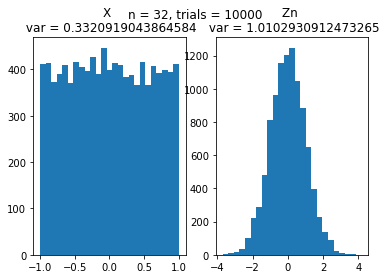

In [11]:
#working with Zn of a random uniform [0,1]
def Z(n,mu,var):
    X = [np.random.uniform(0,1) for i in range(n)]
    Xhat = sum(X)/n

    Z = ((Xhat - mu) / np.sqrt(var)) * np.sqrt(n)

    return Z
    


#if X1 is uniform 0-1, mu = 0.5, variance = using LOTUS 1/3-1/4 = 
mu = 0.5
var = (1/3-1/4)

n = 32
trials = 10000

fig = plt.figure()
fig.suptitle("n = {}, trials = {}".format(n,trials))

ax1 = plt.subplot(1,2,1)
data1 = [X1() for i in range(trials)]
ax1.hist(data1,bins)
ax1.set_title("X \n var = {}".format(np.var(data1)))

ax2 = plt.subplot(1,2,2)
data2 = [Z(n,mu,var) for i in range(trials)]
ax2.hist(data2,bins)
ax2.set_title("Zn \n var = {}".format(np.var(data2)))



NonGuiException: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

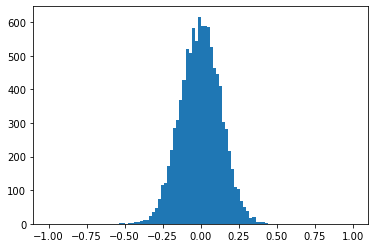

In [12]:
#CLT proof using montecarlo

#n = number of r.v.'s (samples)
n = 10000
# size of each sample - as this increases vraince decrease - ?WLLN
sample_n = 20

x = []
temp = []

for i in range(n):
    for j in range(sample_n):
        #random number between -1 and 1
        temp.append(np.random.uniform(-1,1))
    x.append( sum(temp) / sample_n)
    temp = []

num_bins = 100

n, bins, patches = plt.hist(x, num_bins, range=(-1,1))
#plt.subplot_tool()
plt.show()
